우리 코드 돌려보기 (train = 2012년 5월~2021년 10월 // valid = 2022년 5월 한달)

In [ ]:
# 제발 되었으면...!!!

In [23]:
import pandas as pd
import numpy as np

In [24]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [25]:
from glob import glob

# 데이콘 sklearn 해보기
- https://dacon.io/competitions/official/235949/codeshare/5825?page=1&dtype=recent

## 데이터 불러오기

In [26]:
w_list = sorted(glob("competition_data/water_data/*.csv"))
r_list = sorted(glob("competition_data/rf_data/*.csv"))
sample=pd.read_csv('competition_data/sample_submission.csv')
total_wd=pd.DataFrame()
for i in range(0, len(w_list)):
    total_wd=pd.concat([total_wd, pd.read_csv(w_list[i])])
total_rf=pd.DataFrame()
for i in range(0, len(r_list)):
    total_rf=pd.concat([total_rf, pd.read_csv(r_list[i])])

In [27]:
df_rf=total_rf.copy()
df_water=total_wd.copy()
submission=sample.copy()

In [28]:
df_rf.set_index('ymdhm', inplace=True)
df_water.set_index('ymdhm', inplace=True)
submission.set_index('ymdhm', inplace=True)

In [29]:
df_rf.name = "rain_data"
df_water.name = "water_data"
submission.name = "submission"

## 데이터 전처리

In [30]:
def index_to_datetime(df,format):
    df.index = pd.to_datetime(df.index,
                              format=format)
    return df

In [31]:
df_rf=index_to_datetime(df=df_rf,format='%Y-%m-%d %H:%M')
df_water=index_to_datetime(df=df_water,format='%Y-%m-%d %H:%M')
submission=index_to_datetime(df=submission,format='%Y-%m-%d %H:%M')

In [32]:
df_rf.sort_index(inplace=True)
df_water.sort_index(inplace=True)
submission.sort_index(inplace=True)

In [33]:
# 데이터 시간대 확인하기
def check_datetime(df):
    print(df.name)
    print(df.select_dtypes('datetime64[ns]').head(1).index[0])
    print(df.select_dtypes('datetime64[ns]').tail(1).index[0])
    return None

check_datetime(df_rf)
check_datetime(df_water)
check_datetime(submission)

rain_data
2012-05-01 00:00:00
2022-07-18 23:50:00
water_data
2012-05-01 00:00:00
2022-07-18 23:50:00
submission
2022-06-01 00:00:00
2022-07-18 23:50:00


In [34]:
df_rf_copy=df_rf.copy()
df_water_copy=df_water.copy()

In [35]:
# data target 분리하기
target = df_water.loc[:,submission.columns]
data = pd.concat((df_rf,df_water.drop(submission.columns,axis=1)),axis=1)

In [36]:
# # data와 target 하나 밀어주기 (과거데이터를 사용해야 함으로)
_target = target.reset_index(drop=True)
_data = data.reset_index(drop=True)


In [37]:
_data.index+=1

In [38]:
tot=pd.concat((_data,_target),axis=1)

In [39]:
tot
# 0인덱스에 data 값은 nan 값이 들어감

,rf_10184100,rf_10184110,rf_10184140,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
1,0.0,0.0,0.0,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,314.7,300.2,290.0,275.3
2,0.0,0.0,0.0,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,313.7,301.2,290.0,275.3
3,0.0,0.0,0.0,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,311.7,301.2,290.0,276.3
4,0.0,0.0,0.0,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,311.7,301.2,291.0,277.3
5,0.0,0.0,0.0,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276333,0.0,0.0,0.0,25.040,260.46,212.86,31.14,260.46,492.0,314.01,NaN,-717.30,1006.88,0.0,0.0,0.0,0.0
276334,0.0,0.0,0.0,25.040,259.37,212.86,31.14,259.37,475.0,387.55,NaN,-843.37,1039.90,0.0,0.0,0.0,0.0
276335,0.0,0.0,0.0,25.040,259.13,212.86,31.14,259.13,458.0,454.91,NaN,-1023.37,1073.46,0.0,0.0,0.0,0.0
276336,0.0,0.0,0.0,25.040,258.16,212.86,31.14,258.16,442.0,582.21,NaN,-1049.44,1090.45,NaN,NaN,NaN,NaN


In [40]:
tot.sort_index(inplace=True)

In [41]:
tot

,rf_10184100,rf_10184110,rf_10184140,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.7,300.2,290.0,275.3
1,0.0,0.0,0.0,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,314.7,300.2,290.0,275.3
2,0.0,0.0,0.0,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,313.7,301.2,290.0,275.3
3,0.0,0.0,0.0,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,311.7,301.2,290.0,276.3
4,0.0,0.0,0.0,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276332,0.0,0.0,0.0,25.040,259.23,212.86,31.14,259.23,510.0,319.84,NaN,-456.41,974.40,0.0,0.0,0.0,0.0
276333,0.0,0.0,0.0,25.040,260.46,212.86,31.14,260.46,492.0,314.01,NaN,-717.30,1006.88,0.0,0.0,0.0,0.0
276334,0.0,0.0,0.0,25.040,259.37,212.86,31.14,259.37,475.0,387.55,NaN,-843.37,1039.90,0.0,0.0,0.0,0.0
276335,0.0,0.0,0.0,25.040,259.13,212.86,31.14,259.13,458.0,454.91,NaN,-1023.37,1073.46,0.0,0.0,0.0,0.0


## datetime

In [42]:
df_water_copy

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
ymdhm,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,0.0,319.84,0.0,NaN,0.0,-456.41,0.0,974.40
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,0.0,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,0.0,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90


In [43]:
df_rf_copy.reset_index(inplace=True)

In [44]:
df_datetime=df_rf_copy[['ymdhm']]

In [45]:
df_datetime

,ymdhm
0,2012-05-01 00:00:00
1,2012-05-01 00:10:00
2,2012-05-01 00:20:00
3,2012-05-01 00:30:00
4,2012-05-01 00:40:00
...,...
276331,2022-07-18 23:10:00
276332,2022-07-18 23:20:00
276333,2022-07-18 23:30:00
276334,2022-07-18 23:40:00


In [46]:
# tot 이랑 시간 붙혀주기
tot=pd.concat([df_datetime, tot], axis=1)

In [47]:
# 첫행이랑 막행 없앰 =nan있는 행 삭제
tot=tot.iloc[1:-1]

In [48]:
# 4. valid 로 넘어가기
total=tot.copy()

## 여기까지 하고 train, valid (5)로 이동

In [49]:
# 다시 분리
target = tot.loc[:,submission.columns]
data = tot.drop(submission.columns,axis=1)

In [50]:
# 날짜 분리 (train, test)
train_target=target.iloc[:-len(submission),:]
test_target=target.iloc[-len(submission):,:]

train_data=data.iloc[:-len(submission),:]
test_data=data.iloc[-len(submission):,:]

In [51]:
# null값 처리
train_target.fillna(train_target.mean(),inplace=True)
test_target.fillna(train_target.mean(),inplace=True)
train_data.fillna(train_data.mean(),inplace=True)
test_data.fillna(train_data.mean(),inplace=True)

C:\Users\JiyoonLee\AppData\Local\Temp\ipykernel_29716\2648174185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_target.fillna(train_target.mean(),inplace=True)
C:\Users\JiyoonLee\AppData\Local\Temp\ipykernel_29716\2648174185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_target.fillna(train_target.mean(),inplace=True)
C:\Users\JiyoonLee\AppData\Local\Temp\ipykernel_29716\2648174185.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 an

In [52]:
print('--data--')
print(train_data.shape)
print(test_data.shape)
print('--target--')
print(train_target.shape)
print(test_target.shape)

--data--
(269423, 14)
(6912, 14)
--target--
(269423, 4)
(6912, 4)


In [53]:
valid=total[(total['ymdhm']>'2022-04-30')&(total['ymdhm']<'2022-06-01')]
valid.reset_index(inplace=True, drop=True)

In [54]:
train=total[(total['ymdhm']<'2022-05-01')]
train.reset_index(inplace=True, drop=True)

In [55]:
test=total[total['ymdhm']>='2022-06-01']
test.reset_index(inplace=True, drop=True)

In [58]:
# sklearn 랜포 다시 따라가는.
# 다시 분리
train_target = train.loc[:,submission.columns]
valid_target = valid.loc[:,submission.columns]

train_data = train.drop(submission.columns,axis=1)
valid_data = valid.drop(submission.columns,axis=1)
train_data=train_data.drop('ymdhm', axis=1)
valid_data=valid_data.drop('ymdhm', axis=1)

In [59]:
test_target = test.loc[:,submission.columns]
test_data = test.drop(submission.columns,axis=1)
test_data=test_data.drop('ymdhm', axis=1)

In [60]:
# null값 처리
train_target.fillna(train_target.mean(),inplace=True)
valid_target.fillna(train_target.mean(),inplace=True)
train_data.fillna(train_data.mean(),inplace=True)
valid_data.fillna(train_data.mean(),inplace=True)

In [63]:
test_target.fillna(train_target.mean(),inplace=True)
test_data.fillna(train_data.mean(),inplace=True)

In [64]:
print('--data--')
print(train_data.shape)
print(valid_data.shape)
print('--target--')
print(train_target.shape)
print(valid_target.shape)

--data--
(264959, 13)
(4464, 13)
--target--
(264959, 4)
(4464, 4)


## 모델링 lgb

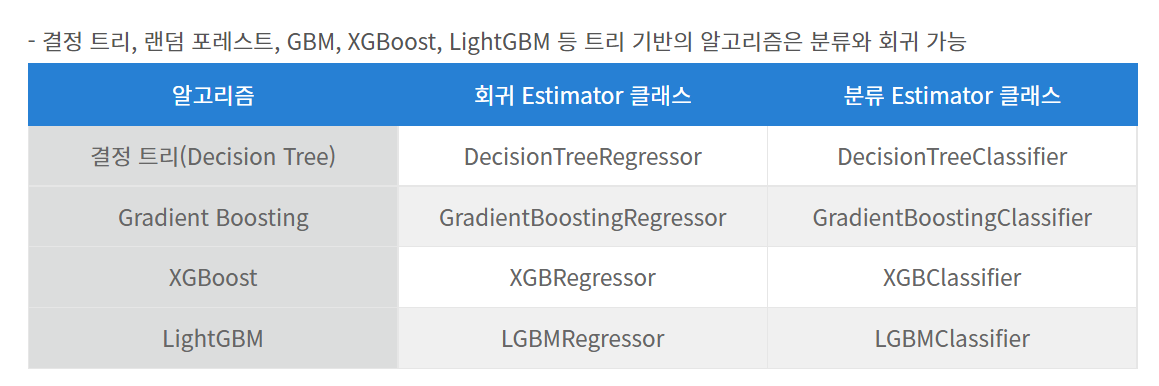

https://dacon.io/competitions/official/235608/talkboard/401049

In [56]:
from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb
from tqdm import tqdm

In [65]:
train_ds = lgb.Dataset(train_data, label = train_target) 
valid_ds = lgb.Dataset(valid_data, label = valid_target) 

In [66]:
base_params={'n_estimators': 900, 'num_leaves': 90, 'learning_rate': 0.1, 
             'colsample_bytree': 0.8, 'subsample': 0.9, 
             'reg_alpha': 5, 'reg_lambda': 7}

In [67]:
base_model=lgb.LGBMRegressor(objective='l1', random_state=18, **base_params)
multi_model=MultiOutputRegressor(base_model)

In [68]:
multi_model.fit(train_data, train_target)
preds=multi_model.predict(valid_data)

In [85]:
len(multi_model.estimators_)

4

In [89]:
fi_df1=pd.DataFrame(multi_model.estimators_[0].feature_importances_,
index=train_data.columns, columns=['importances'])
fi_df1.sort_values(by='importances', ascending=False)

,importances
fw_1018662,14038
tide_level,11451
fw_1019630,11242
fw_1018683,10595
tototf,9040
inf,6966
swl,6435
sfw,5826
ecpc,2466
rf_10184140,854


In [90]:
fi_df2=pd.DataFrame(multi_model.estimators_[1].feature_importances_,
index=train_data.columns, columns=['importances'])
fi_df2.sort_values(by='importances', ascending=False)

,importances
tototf,14146
fw_1019630,11369
fw_1018662,10653
fw_1018683,8305
swl,8295
tide_level,8248
sfw,8077
inf,7415
ecpc,3045
rf_10184140,194


In [91]:
fi_df3=pd.DataFrame(multi_model.estimators_[2].feature_importances_,
index=train_data.columns, columns=['importances'])
fi_df3.sort_values(by='importances', ascending=False)

,importances
fw_1019630,12658
tototf,11909
fw_1018662,11248
tide_level,9163
fw_1018683,9156
sfw,7927
swl,7723
inf,6857
ecpc,3072
rf_10184140,155


In [92]:
fi_df4=pd.DataFrame(multi_model.estimators_[3].feature_importances_,
index=train_data.columns, columns=['importances'])
fi_df4.sort_values(by='importances', ascending=False)

,importances
fw_1019630,15094
tide_level,11861
fw_1018662,11502
fw_1018683,10707
tototf,8751
inf,6533
swl,6275
sfw,6091
ecpc,2231
rf_10184140,376


In [69]:
preds

array([[269.44640081, 260.58182901, 265.34977943, 254.29188583],
       [291.3167951 , 274.05637289, 277.16287829, 267.85491706],
       [291.16444824, 273.60860153, 276.61083139, 265.58451912],
       ...,
       [278.73940928, 267.92549388, 273.25249819, 273.25699925],
       [278.68645519, 269.53578408, 272.49758231, 273.09419752],
       [278.46488644, 269.42815111, 269.60137429, 271.17672294]])

In [70]:
valid_target.values

array([[290.7, 284.2, 279. , 269.3],
       [291.7, 284.2, 279. , 266.3],
       [290.7, 284.2, 279. , 264.3],
       ...,
       [278.7, 277.2, 277. , 272.3],
       [277.7, 276.2, 276. , 271.3],
       [278.7, 276.2, 275. , 270.3]])

In [72]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [73]:
print('rmse : ', sqrt(mean_squared_error( valid_target.values, preds ))) 

rmse :  5.502558561686401


## lgb 하나하나

In [74]:
predictions = []
for i in tqdm(range(valid_target.shape[1])):
    base_model = lgb.LGBMRegressor(**base_params)
    base_model.fit(train_data, train_target.iloc[:, i])
    preds=base_model.predict(valid_data)
    predictions.append(preds)

100%|██████████| 4/4 [00:16<00:00,  4.15s/it]


In [75]:
tmp=pd.DataFrame(predictions[-4])
tmp['1']=pd.DataFrame(predictions[-3])
tmp['2']=pd.DataFrame(predictions[-2])
tmp['3']=pd.DataFrame(predictions[-1])

In [76]:
print('rmse : ', sqrt(mean_squared_error( valid_target.values, tmp.values ))) 

rmse :  4.895844356966749


In [77]:
valid_data.shape, test_data.shape

((4464, 13), (6912, 13))

In [ ]:
# test
predictions = []
for i in tqdm(range(valid_target.shape[1])):
    base_model = lgb.LGBMRegressor(**base_params)
    base_model.fit(train_data, train_target.iloc[:, i])
    preds=base_model.predict(test_data)
    predictions.append(preds)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:19<00:00,  4.90s/it]


In [ ]:
sample['wl_1018662']=pd.DataFrame(predictions[-4])
sample['wl_1018680']=pd.DataFrame(predictions[-3])
sample['wl_1018683']=pd.DataFrame(predictions[-2])
sample['wl_1019630']=pd.DataFrame(predictions[-1])

In [ ]:
sample

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00,279.965905,270.381977,269.507128,269.103332
1,2022-06-01 00:10,280.280117,269.033410,269.065082,267.312812
2,2022-06-01 00:20,281.959947,269.761913,269.084428,265.682230
3,2022-06-01 00:30,284.314019,274.152876,271.033275,262.439573
4,2022-06-01 00:40,285.794426,272.775607,269.927821,259.861895
...,...,...,...,...,...
6907,2022-07-18 23:10,286.647704,293.100907,299.159061,306.679745
6908,2022-07-18 23:20,288.212449,300.727026,303.663115,308.543785
6909,2022-07-18 23:30,290.278187,301.997074,306.597235,309.687360
6910,2022-07-18 23:40,307.645959,306.534897,310.395879,310.938173


In [ ]:
sample.to_csv('ans_0816(lgb).csv', index=False)